In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hmeq-data/hmeq.csv
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/__script__.py
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/xyzservices-2025.10.0-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/gast-0.4.0-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/google_auth-2.43.0-py2.py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/tensorboard-2.12.3-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/pyasn1-0.6.1-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/typing_extensions-4.15.0-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/requests-2.32.5-py3-none-any.whl
/kaggle/input/pm-99849704-at-11-19-2025-05-41-45/keras-2.12.0-py2.p

## Loan Default Prediction using Deep Learning on HMEQ Dataset

**This project predicts loan defaults using the HMEQ dataset, containing applicants’ financial and personal data. The workflow includes data preprocessing, handling missing values, encoding categorical features, feature scaling, and addressing class imbalance using SMOTE. A deep neural network with Dropout, BatchNormalization, and L2 regularization predicts defaults.**

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [3]:
dataset = pd.read_csv("/kaggle/input/hmeq-data/hmeq.csv")

In [4]:
dataset.head(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN


In [5]:
dataset.tail(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


**Check shape & info**

In [6]:
dataset.shape

(5960, 13)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
dataset.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

## Data Cleaning

**Check Missing Values**

In [9]:
dataset.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

**Handle Missing Values**

In [10]:
for col in dataset.columns:
    if dataset[col].dtype == "object":
        dataset[col].fillna(dataset[col].mode()[0],inplace = True)

    else:
        dataset[col].fillna(dataset[col].mean(),inplace = True)

**Check duplicate rows**

In [11]:
dataset.duplicated().sum()

0

**Explore Target Variable 'BAD'**

In [12]:
bad = dataset["BAD"].value_counts()
print(bad)

BAD
0    4771
1    1189
Name: count, dtype: int64


In [13]:
paid = round(bad[0]/dataset["BAD"].count()*100,2)
default = round(bad[1]/dataset["BAD"].count()*100,2)

print("Percentage of good_loan :", paid )
print()
print("Percentage of bad_loan :", default )

Percentage of good_loan : 80.05

Percentage of bad_loan : 19.95


## Visualization

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

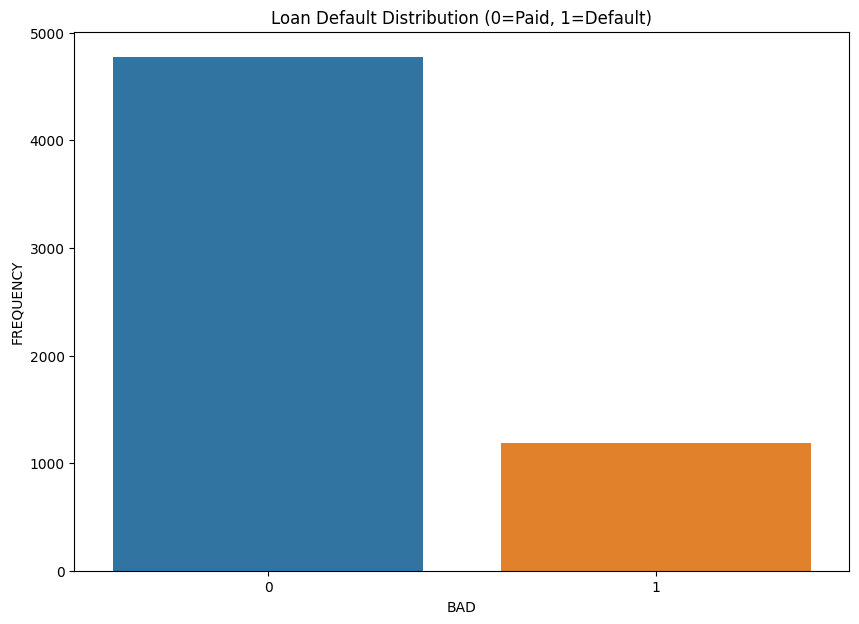

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x = "BAD", data = dataset)
plt.title("Loan Default Distribution (0=Paid, 1=Default)")
plt.xlabel("BAD")
plt.ylabel("FREQUENCY")
plt.show()

**Feature Distribution and Analysis**

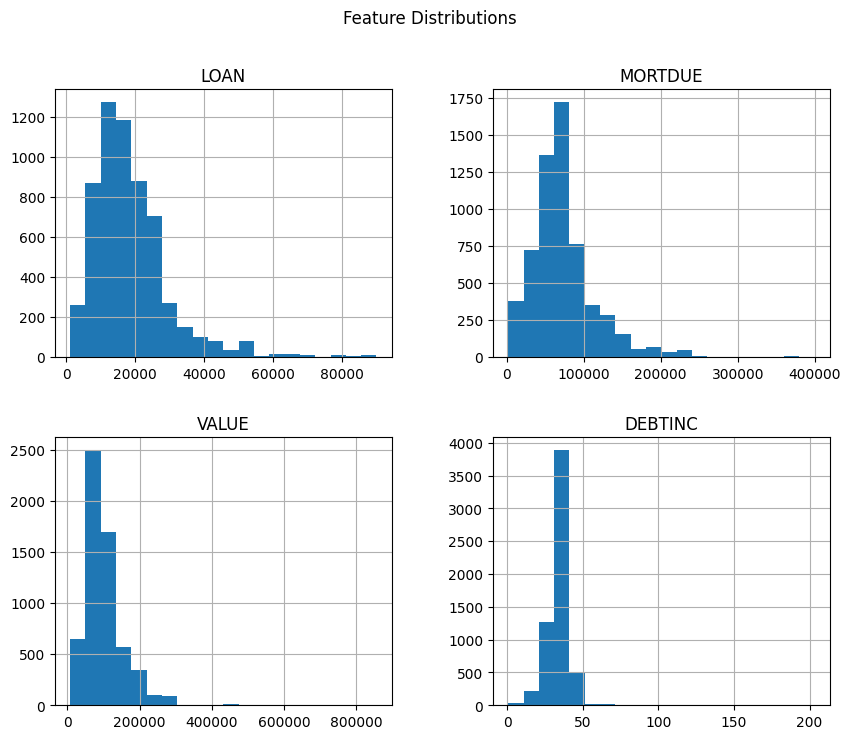

In [16]:
dataset[['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']].hist(figsize=(10,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

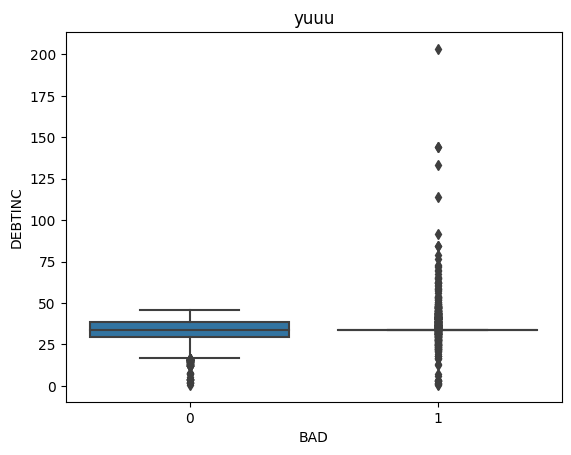

In [17]:
sns.boxplot(x = "BAD", y = "DEBTINC", data = dataset)
plt.title("yuuu")
plt.show()

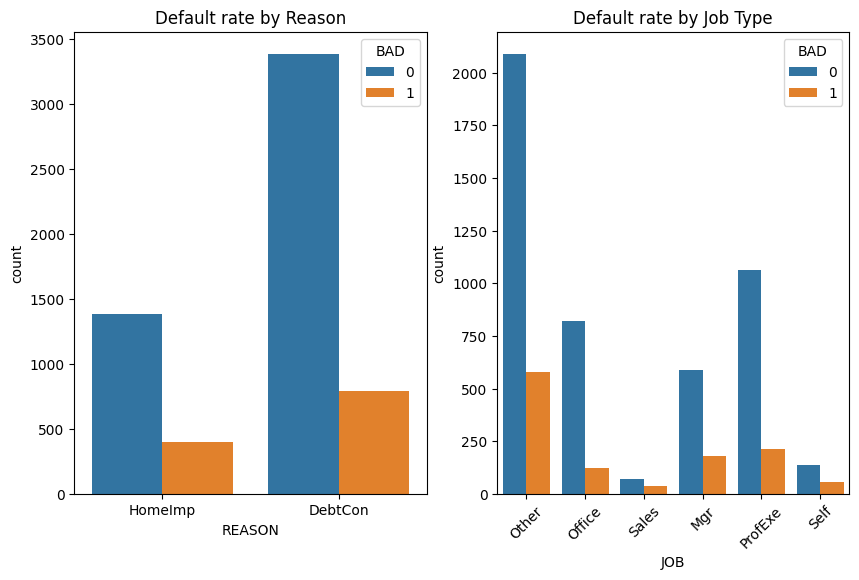

In [18]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.countplot(x='REASON', hue='BAD', data=dataset)
plt.title("Default rate by Reason")

plt.subplot(1,2,2)
sns.countplot(x='JOB', hue='BAD', data=dataset)
plt.title("Default rate by Job Type")
plt.xticks(rotation=45)
plt.show()

## Encode Categorical Columns

In [19]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

dataset["REASON"] = label.fit_transform(dataset["REASON"])
dataset["JOB"] = label.fit_transform(dataset["JOB"])

**Move target to last column**

In [20]:
dataset["BAD"] = dataset.pop("BAD")
dataset.head(3)

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
0,1100,25860.0,39025.0,1,2,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,1
1,1300,70053.0,68400.0,1,2,7.0,0.0,2.0,121.833333,0.0,14.0,33.779915,1
2,1500,13500.0,16700.0,1,2,4.0,0.0,0.0,149.466667,1.0,10.0,33.779915,1


**Split dataset into features (x) and target (y)**

In [21]:
x = dataset.iloc[:,:-1]
y = dataset["BAD"]

**Train Test Split**

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

**Feature Scaling**

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

**Handling Class Imbalance with SMOTE**

In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x_train_scaled,y_train)

In [25]:
from collections import Counter
print("Before resampling :", Counter(y_train))
print("After resampling :", Counter(y_resampled))

Before resampling : Counter({0: 3844, 1: 924})
After resampling : Counter({0: 3844, 1: 3844})


In [26]:
x_resampled.shape

(7688, 12)

## Build Deep Learning Model

In [27]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [28]:
model = Sequential()

model.add(Input(shape=(12,),name = "Input_Layer"))
model.add(Dense(64,activation="relu",name = "Hidden_Layer_1",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(48,activation="relu",name = "Hidden_Layer_2",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu",name = "Hidden_Layer_3",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(16,activation="relu",name = "Hidden_Layer_4",kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid",name = "Output_Layer"))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 64)                832       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Hidden_Layer_2 (Dense)      (None, 48)                3120      
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 48)                0

**Compile Model**

In [30]:
optimizer = Adam(learning_rate=0.0004)
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy",Precision(),Recall()])

In [31]:
eraly_stop = EarlyStopping(monitor='val_loss',patience=25,restore_best_weights=True)

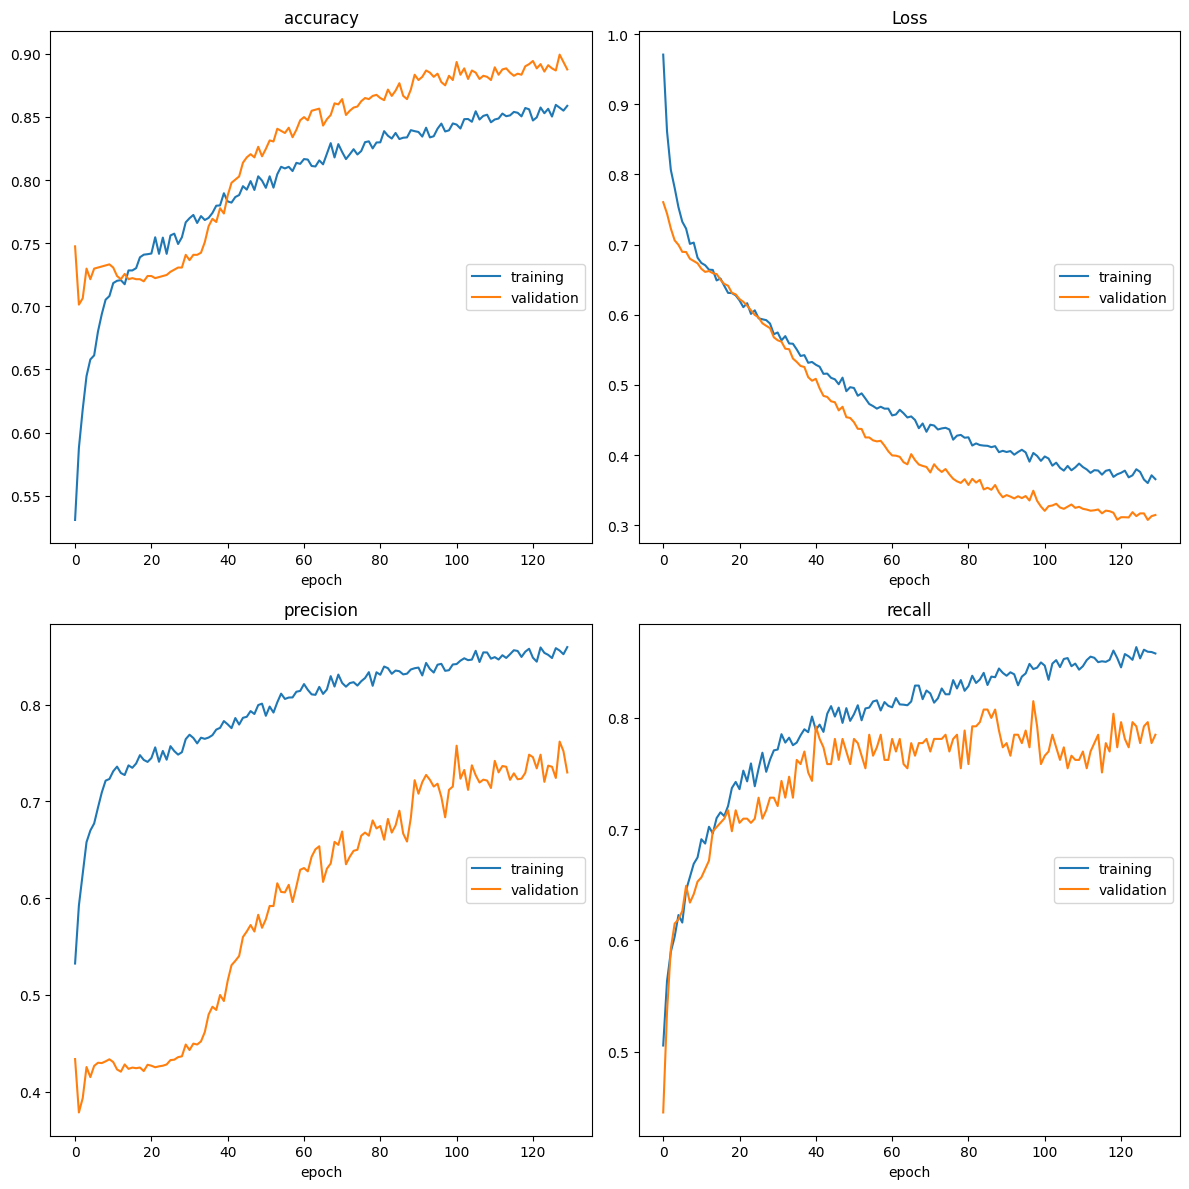

accuracy
	training         	 (min:    0.531, max:    0.860, cur:    0.859)
	validation       	 (min:    0.701, max:    0.899, cur:    0.888)
Loss
	training         	 (min:    0.360, max:    0.971, cur:    0.366)
	validation       	 (min:    0.307, max:    0.760, cur:    0.315)
precision
	training         	 (min:    0.532, max:    0.859, cur:    0.859)
	validation       	 (min:    0.379, max:    0.762, cur:    0.730)
recall
	training         	 (min:    0.505, max:    0.864, cur:    0.858)
	validation       	 (min:    0.445, max:    0.815, cur:    0.785)
129/129 [==============================] - 1s 11ms/step - loss: 0.3656 - accuracy: 0.8587 - precision: 0.8593 - recall: 0.8580 - val_loss: 0.3145 - val_accuracy: 0.8876 - val_precision: 0.7298 - val_recall: 0.7849


In [32]:
history = model.fit(x_resampled,y_resampled,epochs=130,validation_data=(x_test_scaled,y_test),batch_size=60,callbacks=[PlotLossesKerasTF(),eraly_stop ])

In [33]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

In [34]:
y_pred = (model.predict(x_test_scaled) > 0.5).astype("int32")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred))

38/38 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[850  77]
 [ 57 208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       927
           1       0.73      0.78      0.76       265

    accuracy                           0.89      1192
   macro avg       0.83      0.85      0.84      1192
weighted avg       0.89      0.89      0.89      1192


ROC-AUC Score: 0.8509210071034581


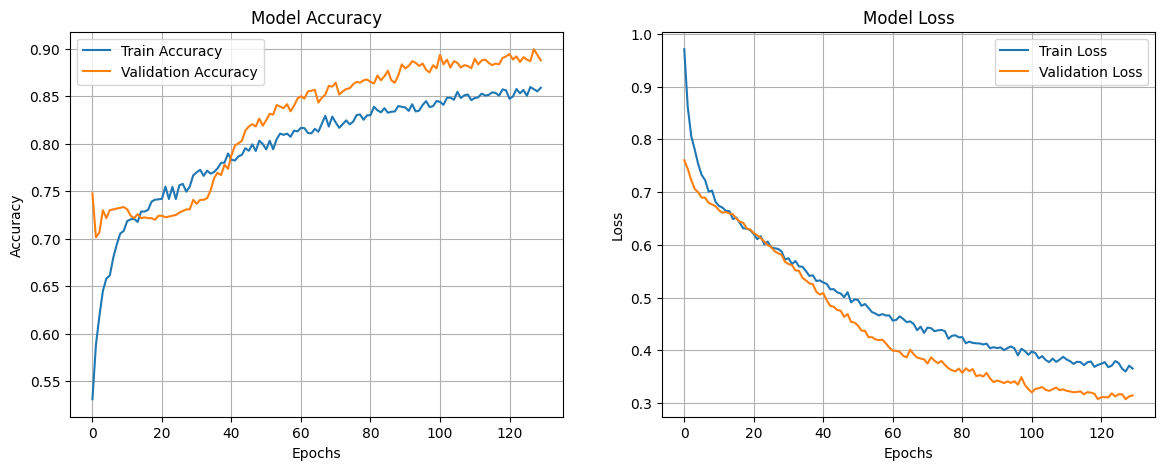

In [35]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()